# SVG Test
Purpose: To test creating a black box diagram using svg in html document

In [1]:
from pyMez import *
from pyMez.Code.Analysis.ProgramAnalysis import *
from pyMez.Code.Analysis.SParameter import *
from pyMez.Code.DataHandlers.GraphModels import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 1.852 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.318 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 7.196 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.007 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.245 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.02 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 1.123 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.008 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.007 s to import Code.Utils.Names
It took 10.776 s to import all of the active modules


In [3]:
new_html=HTMLBase()

In [4]:
len(new_html.root.getchildren())

0

In [4]:
new_html.add_head()
new_html.add_body()

In [5]:
def String_to_SVGAnchorLinkElement(string,**options):
    """Converts a string to a DataURI"""
    defaults={"suggested_name":"test.txt",
              "mime_type":"text/plain"}
    link_options={}
    for key,value in defaults.iteritems():
        link_options[key]=value
    for key,value in options.iteritems():
        link_options[key]=value
    if type(string) not in StringTypes:
        string=str(string)
    base_64=base64.encodestring(string)
    data_uri="data:{0};base64,{1}".format(link_options["mime_type"],base_64)
    anchor_dictionary={"tag":"a","xlink:href":data_uri,"xlink:download":link_options["suggested_name"]}
    out_element=make_html_element(**anchor_dictionary)
    return out_element

In [8]:
palette_width=1200
palette_height=300
title_height=100
edge_border=5
path_border=100
thirds=round(palette_width/3.0)
number_inputs=5
input_names=["a","b","c","a_very_long_name_indeed","e"]
number_outputs=2
output_names=["output 1","ouptut_2"]
input_box_height=(palette_height-(number_inputs+1)*edge_border)/number_inputs
ouput_box_height=(palette_height-(number_outputs+1)*edge_border)/number_outputs
box_width=thirds-2*edge_border-path_border
new_svg=make_html_element(tag="svg",width="{0}".format(palette_width),height="{0}".format(palette_height+title_height),
                          **{"xmlns:xlink":"http://www.w3.org/1999/xlink"})
line_template="M {4} 0 l 0 {0} M {1} 0 l 0 {0} M {2} 0 l 0 {0} M {3} 0 l 0 {0} M 0 {0} l {3} 0 M 0 0 l {3} 0"
new_line=make_html_element(tag="path",
                           **{"d":line_template.format(palette_height,
                                                       thirds,
                                                       2*thirds,
                                                       palette_width-edge_border,
                                                       edge_border), 
                              "stroke":"black", 
                              "stroke-width":"3",
                             "stroke-dasharray":"5, 5, 1, 5"})
new_svg.append(new_line)
for i in range(number_inputs):
    new_rect=make_html_element(tag="rect",**{"x":str(2*edge_border),
                               "y":str(i*input_box_height+(i+1)*edge_border),"height":str(input_box_height),
                               "width":str(box_width),
                               "stroke":"black","id":"inputs-{0}".format(i) ,
                              "stroke-width":"1","opacity":".25"})
    
    new_path=make_html_element(tag="path",
                           **{"d":"M {0} {1} L {2} {3}".format(2*edge_border+box_width,
                                                               i*input_box_height+(i+1)*edge_border+input_box_height/2,
                                                               path_border+thirds,palette_height/2.0),
                              "stroke":"black", 
                              "stroke-width":"1"})
    new_text=make_html_element(tag="text",text=input_names[i],**{"x":str(2*edge_border+box_width/2),
                               "y":str(i*input_box_height+(i+1)*edge_border+input_box_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(input_box_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "stroke":"black"})
    new_svg.append(new_text)
    new_svg.append(new_path)
    new_svg.append(new_rect)
for i in range(number_outputs):
    new_rect=make_html_element(tag="rect",**{"x":str(path_border+2*thirds),
                               "y":str(i*ouput_box_height+(i+1)*edge_border),"height":str(ouput_box_height),
                               "width":str(box_width),
                               "stroke":"black","id":"outputs-{0}".format(i), 
                              "stroke-width":"1","opacity":".25"})
    
    new_path=make_html_element(tag="path",
                           **{"d":"M {0} {1} L {2} {3}".format(2*thirds-path_border,
                                                               palette_height/2.0,
                                                               path_border+2*thirds,
                                                               i*ouput_box_height+(i+1)*edge_border+ouput_box_height/2),
                              "stroke":"black", 
                              "stroke-width":"1"})
    new_text=make_html_element(tag="text",text=output_names[i],**{"x":str(2*edge_border+path_border+2*thirds+box_width/2),
                               "y":str(i*ouput_box_height+(i+1)*edge_border+ouput_box_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(ouput_box_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "stroke":"black"})
    new_svg.append(new_text)
    new_svg.append(new_path)
    new_svg.append(new_rect)    
    
new_rect=make_html_element(tag="rect",**{"x":str(path_border+thirds),
                               "y":str(edge_border),"height":str(palette_height-2*edge_border),
                               "width":str(thirds-2*path_border),"id":"Action",
                               "stroke":"black", 
                              "stroke-width":"1","opacity":".25"})
new_text=make_html_element(tag="text",text="Function",**{"x":str(3*thirds/2),
                               "y":str(palette_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(ouput_box_height/5),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "stroke":"black"})
inputs_title=make_html_element(tag="text",text="Inputs",**{"x":str(thirds/2),
                               "y":str(palette_height+title_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(title_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "text-decoration":"underline"})
action_title=make_html_element(tag="text",text="Action",**{"x":str(3*thirds/2),
                               "y":str(palette_height+title_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(title_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "text-decoration":"underline"})
output_title=make_html_element(tag="text",text="Outputs",**{"x":str(5*thirds/2),
                               "y":str(palette_height+title_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(title_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "text-decoration":"underline"})
new_svg.append(inputs_title)
new_svg.append(action_title)
new_svg.append(output_title)
new_svg.append(new_rect)
new_svg.append(new_text)

In [9]:
new_html.append_to_body({"tag":"br"})
new_html.append_to_body(new_svg)
new_html.show()

In [10]:
new_html.show()

file://c:/users/sandersa/appdata/local/temp/1/tmp16dffw.html


In [132]:
help("make_html_element)

Help on function make_html_element in module pyMeasure.Code.DataHandlers.HTMLModels:

make_html_element(tag, text=None, **attribute_dictionary)
    Creates an lxml.html.HtmlElement given a tag, text and attribute dictionary
    <tag key1="value2" key2="value2">text</tag>



In [140]:
import inspect
print inspect.getsource(make_html_element)
print inspect.getargspec(make_html_element)


def make_html_element(tag,text=None,**attribute_dictionary):
    """Creates an lxml.html.HtmlElement given a tag, text and attribute dictionary
     <tag key1="value2" key2="value2">text</tag> """
    position_arguments=[tag]
    if text:
        position_arguments.append(text)
    new_tag=lxml.html.builder.E(*position_arguments,**attribute_dictionary)
    return new_tag

ArgSpec(args=['tag', 'text'], varargs=None, keywords='attribute_dictionary', defaults=(None,))


AttributeError: 'HtmlElement' object has no attribute 'f_code'

In [144]:
def svg_example(function):
    """Timer is meant to be a decorator for a function or method that prints its time"""

    def svg_out(*args,**keywordargs):
        number_inputs=len(args)+len(keywordargs)
        print(number_inputs)
        for arg
        result=function(*args,**keywordargs)
        if type(result) in [ListType,DictionaryType] and len(result)<5:
            number_outputs=len(result)
        
        print(result)    
        action_code=inspect.getsource(function)
        print(action_code)
        return result

    return svg_out
@svg_example
def make_html_element_decorated(tag,text=None,**attribute_dictionary):
    """Creates an lxml.html.HtmlElement given a tag, text and attribute dictionary
     <tag key1="value2" key2="value2">text</tag> """
    position_arguments=[tag]
    if text:
        position_arguments.append(text)
    new_tag=lxml.html.builder.E(*position_arguments,**attribute_dictionary)
    return new_tag

In [145]:
make_html_element_decorated(tag="text",text="Outputs",**{"x":str(5*thirds/2),
                               "y":str(palette_height+title_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(title_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "text-decoration":"underline"})

9
<Element text at 0x11bff318>
@svg_example
def make_html_element_decorated(tag,text=None,**attribute_dictionary):
    """Creates an lxml.html.HtmlElement given a tag, text and attribute dictionary
     <tag key1="value2" key2="value2">text</tag> """
    position_arguments=[tag]
    if text:
        position_arguments.append(text)
    new_tag=lxml.html.builder.E(*position_arguments,**attribute_dictionary)
    return new_tag



<Element text at 0x11bff318>

In [146]:
len({"x":1,"y":2})

2

In [ ]:
def create_svg_example(function,inputs,outputs,**options):
    """Creates a svg example image, linking the real value of the input arguments to the name of the arguments using 
    data uri's arguments should be in the form arguments=(*args,**keywordargs) where args is a list and keywordargs is a 
    dictionary"""
    defaults={"image_width":1200,"image_height":300,"title_height":100,"edge_border":5,"path_border":100,
              "grid_style":"stroke:black;stroke-width:5;",
              "input_box_style":"",
              "input_line_style":"",
              "action_box_style":"",
              "ouput_line_style":"",
              "output_box_style":"",
              "text"
              
             }
    example_options={}
    for key,value in defaults.iteritems():
        example_options[key]=value
    for key,value in options:
        example_options[key]=value
    number_inputs=0
    if arguments[0] is not None:
        number_inputs=len(arguments[0])
    if arguments[1] is not None:
        number_inputs=number_inputs+len(arguments[1])
    output=function(*arguments[0],**arguments[1])
    if type(output) in [StringType,DictionaryType] and len(output)<5:
        number_outputs=len(output)
    else:
        number_ouputs=1
    action_code=inspect.getsource(function)    
    palette_width=example_options["image_width"]
    palette_height=example_options["image_height"]
    title_height=example_options["title_height"]
    edge_border=example_options["edge_border"]
    path_border=example_options["path_border"]
    thirds=round(palette_width/3.0)
    input_box_height=(palette_height-(number_inputs+1)*edge_border)/number_inputs
    ouput_box_height=(palette_height-(number_outputs+1)*edge_border)/number_outputs
    box_width=thirds-2*edge_border-path_border
    new_svg=make_html_element(tag="svg",width="{0}".format(palette_width),height="{0}".format(palette_height+title_height),
                              **{"xmlns:xlink":"http://www.w3.org/1999/xlink"})
    line_template="M {4} 0 l 0 {0} M {1} 0 l 0 {0} M {2} 0 l 0 {0} M {3} 0 l 0 {0} M 0 {0} l {3} 0 M 0 0 l {3} 0"
    new_line=make_html_element(tag="path",
                               **{"d":line_template.format(palette_height,
                                                           thirds,
                                                           2*thirds,
                                                           palette_width-border,
                                                           border), 
                                  "style":example_options["grid_style"]})
    new_svg.append(new_line)
    for i in range(number_inputs):
        new_rect=make_html_element(tag="rect",**{"x":str(2*edge_border),
                                   "y":str(i*input_box_height+(i+1)*edge_border),"height":str(input_box_height),
                                   "width":str(box_width),
                                   "stroke":"black","id":"inputs-{0}".format(i) ,
                                  "stroke-width":"1"})

        new_path=make_html_element(tag="path",
                               **{"d":"M {0} {1} L {2} {3}".format(2*edge_border+box_width,
                                                                   i*input_box_height+(i+1)*edge_border+input_box_height/2,
                                                                   path_border+thirds,palette_height/2.0),
                                  "stroke":"black", 
                                  "stroke-width":"1"})
        new_svg.append(new_path)
        new_svg.append(new_rect)
    for i in range(number_outputs):
        new_rect=make_html_element(tag="rect",**{"x":str(path_border+2*thirds),
                                   "y":str(i*ouput_box_height+(i+1)*edge_border),"height":str(ouput_box_height),
                                   "width":str(box_width),
                                   "stroke":"black","id":"outputs-{0}".format(i), 
                                  "stroke-width":"1"})

        new_path=make_html_element(tag="path",
                               **{"d":"M {0} {1} L {2} {3}".format(2*thirds-path_border,
                                                                   palette_height/2.0,
                                                                   path_border+2*thirds,
                                                                   i*ouput_box_height+(i+1)*edge_border+ouput_box_height/2),
                                  "stroke":"black", 
                                  "stroke-width":"1"})

        new_svg.append(new_path)
        new_svg.append(new_rect)    

    new_rect=make_html_element(tag="rect",**{"x":str(path_border+thirds),
                                   "y":str(edge_border),"height":str(palette_height-2*edge_border),
                                   "width":str(thirds-2*path_border),"id":"Action",
                                   "stroke":"black", 
                                  "stroke-width":"1"})
    inputs_title=make_html_element(tag="text",text="Inputs",**{"x":str(thirds/2),
                                   "y":str(palette_height+title_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(title_height/3),
                                               "text-anchor":"middle",
                                               "alignment-baseline":"middle",
                                                "text-decoration":"underline"})
    action_title=make_html_element(tag="text",text="Action",**{"x":str(3*thirds/2),
                                   "y":str(palette_height+title_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(title_height/3),
                                               "text-anchor":"middle",
                                               "alignment-baseline":"middle",
                                                "text-decoration":"underline"})
    output_title=make_html_element(tag="text",text="Outputs",**{"x":str(5*thirds/2),
                                   "y":str(palette_height+title_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(title_height/3),
                                               "text-anchor":"middle",
                                               "alignment-baseline":"middle",
                                                "text-decoration":"underline"})
    new_svg.append(inputs_title)
    new_svg.append(action_title)
    new_svg.append(output_title)
    new_svg.append(new_rect)
    

In [85]:
import inspect
function=S2PV1_to_XmlDataTable
palette_width=1200
palette_height=200
title_height=100
edge_border=5
path_border=50
input_data=S2PV1(os.path.join(TESTS_DIRECTORY,"thru.s2p"))
thirds=round(palette_width/3.0)
input_names=["thru.s2p"]
number_inputs=len(input_names)
output_names=["thru_s2p.xml"]
number_outputs=len(output_names)
box_text_ratio=8

input_box_height=(palette_height-(number_inputs+1)*edge_border)/number_inputs
ouput_box_height=(palette_height-(number_outputs+1)*edge_border)/number_outputs
box_width=thirds-2*edge_border-path_border
new_svg=make_html_element(tag="svg",width="{0}".format(palette_width),height="{0}".format(palette_height+title_height),
                          **{"xmlns:xlink":"http://www.w3.org/1999/xlink"})
new_def=make_html_element(tag="defs")
new_marker=make_html_element(tag="marker",id="arrow",
                             markerWidth="10",
                             markerHeight="10",
                             refX="10",
                             refY="3",
                             orientd="M0,0 L0,6 L9,3 z", fill="#f00",orient="auto",
                             markerUnits="strokeWidth")
new_path=make_html_element(tag="path",**{"d":"M0,0 L0,6 L9,3 z","fill":"#f00"})
new_marker.append(new_path)
new_def.append(new_marker)
new_svg.append(new_def)
line_template="M {4} 0 l 0 {0} M {1} 0 l 0 {0} M {2} 0 l 0 {0} M {3} 0 l 0 {0} M 0 {0} l {3} 0 M 0 0 l {3} 0"
new_line=make_html_element(tag="path",
                           **{"d":line_template.format(palette_height,
                                                       thirds,
                                                       2*thirds,
                                                       palette_width-edge_border,
                                                       edge_border), 
                              "stroke":"black", 
                              "stroke-width":"3",
                             "stroke-dasharray":"5, 5, 1, 5"})
new_svg.append(new_line)
for i in range(number_inputs):
    new_anchor=String_to_SVGAnchorLinkElement(str(input_data))
    new_rect=make_html_element(tag="rect",**{"x":str(2*edge_border),
                               "y":str(i*input_box_height+(i+1)*edge_border),"height":str(input_box_height),
                               "width":str(box_width),
                               "stroke":"black","id":"inputs-{0}".format(i) ,
                              "stroke-width":"1","opacity":".25"})
    
    new_path=make_html_element(tag="path",
                           **{"d":"M {0} {1} L {2} {3}".format(2*edge_border+box_width,
                                                               i*input_box_height+(i+1)*edge_border+input_box_height/2,
                                                               path_border+thirds,palette_height/2.0),
                              "stroke":"black", 
                              "stroke-width":"5","marker-end":"url(#arrow)"})
    new_text=make_html_element(tag="text",text=input_names[i],**{"x":str(2*edge_border+box_width/2),
                               "y":str(i*input_box_height+(i+1)*edge_border+input_box_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(input_box_height/box_text_ratio),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "stroke":"black"})
    new_svg.append(new_text)
    new_svg.append(new_path)
    new_anchor.append(new_rect)
    new_svg.append(new_anchor)
for i in range(number_outputs):
    new_anchor=String_to_SVGAnchorLinkElement(str(S2PV1_to_XmlDataTable(input_data)))
    new_rect=make_html_element(tag="rect",**{"x":str(path_border+2*thirds),
                               "y":str(i*ouput_box_height+(i+1)*edge_border),"height":str(ouput_box_height),
                               "width":str(box_width),
                               "stroke":"black","id":"outputs-{0}".format(i), 
                              "stroke-width":"1","opacity":".25"})
    
    new_path=make_html_element(tag="path",
                           **{"d":"M {0} {1} L {2} {3}".format(2*thirds-path_border,
                                                               palette_height/2.0,
                                                               path_border+2*thirds,
                                                               i*ouput_box_height+(i+1)*edge_border+ouput_box_height/2),
                              "stroke":"black", 
                              "stroke-width":"1",
                             "marker-end":"url(#arrow)"})
    new_text=make_html_element(tag="text",text=output_names[i],**{"x":str(2*edge_border+path_border+2*thirds+box_width/2),
                               "y":str(i*ouput_box_height+(i+1)*edge_border+ouput_box_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(ouput_box_height/box_text_ratio),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "stroke":"black"})
    new_svg.append(new_text)
    new_svg.append(new_path)
    new_anchor.append(new_rect)
    new_svg.append(new_anchor)
    
new_anchor=String_to_SVGAnchorLinkElement(str(inspect.getsource(function)))
    
new_rect=make_html_element(tag="rect",**{"x":str(path_border+thirds),
                               "y":str(edge_border),"height":str(palette_height-2*edge_border),
                               "width":str(thirds-2*path_border),"id":"Action",
                               "stroke":"black", 
                              "stroke-width":"1","opacity":".25"})
new_text=make_html_element(tag="text",text=function.__name__,**{"x":str(3*thirds/2),
                               "y":str(palette_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(ouput_box_height/box_text_ratio),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "stroke":"black"})
inputs_title=make_html_element(tag="text",text="Inputs",**{"x":str(thirds/2),
                               "y":str(palette_height+title_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(title_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "text-decoration":"underline"})
action_title=make_html_element(tag="text",text="Action",**{"x":str(3*thirds/2),
                               "y":str(palette_height+title_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(title_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "text-decoration":"underline"})
output_title=make_html_element(tag="text",text="Outputs",**{"x":str(5*thirds/2),
                               "y":str(palette_height+title_height/2),
                                          "font-weight":"bold",
                                          "font-size":"{0}px".format(title_height/3),
                                           "text-anchor":"middle",
                                           "alignment-baseline":"middle",
                                            "text-decoration":"underline"})
new_svg.append(inputs_title)
new_svg.append(action_title)
new_svg.append(output_title)
new_svg.append(new_text)
new_anchor.append(new_rect)
new_svg.append(new_anchor)


In [86]:
new_html=HTMLBase()
new_html.add_head()
new_html.add_body()
new_html.append_to_body({"tag":"br"})
new_html.append_to_body(new_svg)
new_html.append_to_head({"tag":"style","text":"rect:hover {stroke-width:8;stroke:blue;}"})
new_html.show()
#new_html.save("BlackBox.html")

file://c:/users/sandersa/appdata/local/temp/1/tmpwyfxeg.html


In [22]:
function.__name__


'S2PV1_to_XmlDataTable'

In [36]:
print inspect.getargspec(function)


ArgSpec(args=['s2p'], varargs=None, keywords='options', defaults=None)


In [84]:
def test_function(new_input):
    print new_input
test_function(**{"new_input":10})

10


In [143]:
def create_svg_black_box_diagram(inputs,outputs,function,**options):
    """Creates a svg black box diagram given a input dictionary of name:value pairs, an outputs list of 
    output names and a function. Options are keywords that define the appearence of the diagram, to display the diagram 
    append it to the body of an html sheet"""
    defaults={"image_width":1200,
              "image_height":300,
              "title_height":100,
              "edge_border":5,
              "path_border":50,
              "grid_style":"stroke:black;stroke-width:1;stroke-dasharray:5, 5, 1, 5",
              "input_box_stroke":"black",
              "input_box_stroke_width":"1",
              "input_box_opacity":".25",
              "input_line_style":"stroke:black;stroke-width:5",
              "action_box_style":"stroke:black;stroke-width:1;opacity:.25;",
              "action_box_stroke":"black",
              "action_box_stroke_width":"1",
              "action_box_opacity":".25",
              "output_line_style":"stroke:black;stroke-width:5",
              "output_box_stroke":"black",
              "output_box_stroke_width":"1",
              "output_box_opacity":".25",
              "title_text_ratio":3,
              "box_text_ratio":8,
              "arrow_fill":"#f00",
              "ouput_transformation_function":None,
              "output_mime_type":"text/plain"
              
             }
    example_options={}
    for key,value in defaults.iteritems():
        example_options[key]=value
    for key,value in options.iteritems():
        example_options[key]=value
    palette_width=example_options["image_width"]
    palette_height=example_options["image_height"]
    title_height=example_options["title_height"]
    edge_border=example_options["edge_border"]
    path_border=example_options["path_border"]
    thirds=round(palette_width/3.0)
    input_names=inputs.keys()
    number_inputs=len(input_names)
    output_names=outputs
    number_outputs=len(output_names)
    output_data=function(**inputs)
    if example_options["ouput_transformation_function"]:
        output_data=example_options["ouput_transformation_function"](output_data)
        #print(output_data)
    if type(output_data) is ListType:
        output_dictionary={name:output_data[i] for i,name in enumerate(output_names) }
    else:
        output_dictionary={output_names[0]:output_data}
        
    box_text_ratio=example_options["box_text_ratio"]

    input_box_height=(palette_height-(number_inputs+1)*edge_border)/number_inputs
    output_box_height=(palette_height-(number_outputs+1)*edge_border)/number_outputs
    box_width=thirds-2*edge_border-path_border
    new_svg=make_html_element(tag="svg",width="{0}".format(palette_width),height="{0}".format(palette_height+title_height),
                              **{"xmlns:xlink":"http://www.w3.org/1999/xlink"})
    new_def=make_html_element(tag="defs")
    new_marker=make_html_element(tag="marker",id="arrow",
                                 markerWidth="10",
                                 markerHeight="10",
                                 refX="10",
                                 refY="3",
                                 orientd="M0,0 L0,6 L9,3 z", fill=example_options["arrow_fill"],orient="auto",
                                 markerUnits="strokeWidth")
    new_path=make_html_element(tag="path",**{"d":"M0,0 L0,6 L9,3 z","fill":"#f00"})
    new_marker.append(new_path)
    new_def.append(new_marker)
    new_svg.append(new_def)
    line_template="M {4} 0 l 0 {0} M {1} 0 l 0 {0} M {2} 0 l 0 {0} M {3} 0 l 0 {0} M 0 {0} l {3} 0 M 0 0 l {3} 0"
    new_line=make_html_element(tag="path",
                               **{"d":line_template.format(palette_height,
                                                           thirds,
                                                           2*thirds,
                                                           palette_width-edge_border,
                                                           edge_border), 
                                  "style":example_options["grid_style"]})
    new_svg.append(new_line)
    for i in range(number_inputs):
        new_anchor=String_to_SVGAnchorLinkElement(str(inputs[input_names[i]]))
        new_rect=make_html_element(tag="rect",**{"x":str(2*edge_border),
                                   "y":str(i*input_box_height+(i+1)*edge_border),"height":str(input_box_height),
                                   "width":str(box_width),
                                   "id":"inputs-{0}".format(i) ,
                                   "stroke":example_options["input_box_stroke"],
                                   "stroke-width":example_options["input_box_stroke_width"],
                                                "opacity":example_options["input_box_opacity"]})

        new_path=make_html_element(tag="path",
                               **{"d":"M {0} {1} L {2} {3}".format(2*edge_border+box_width,
                                                                   i*input_box_height+(i+1)*edge_border+input_box_height/2,
                                                                   path_border+thirds,palette_height/2.0),
                                "marker-end":"url(#arrow)","style":example_options["input_line_style"]})
        new_text=make_html_element(tag="text",text=input_names[i],**{"x":str(2*edge_border+box_width/2),
                                   "y":str(i*input_box_height+(i+1)*edge_border+input_box_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(max(box_width,input_box_height)/box_text_ratio),
                                               "text-anchor":"middle",
                                               "alignment-baseline":"middle",
                                                "stroke":"black"})
        new_svg.append(new_text)
        new_svg.append(new_path)
        new_anchor.append(new_rect)
        new_svg.append(new_anchor)
    for i in range(number_outputs):
        new_anchor=String_to_SVGAnchorLinkElement(str(output_dictionary[output_names[i]]),
                                                  mime_type=example_options["output_mime_type"])
        new_rect=make_html_element(tag="rect",**{"x":str(path_border+2*thirds),
                                   "y":str(i*ouput_box_height+(i+1)*edge_border),"height":str(output_box_height),
                                   "width":str(box_width),
                                   "id":"outputs-{0}".format(i), 
                                  "stroke":example_options["output_box_stroke"],
                                   "stroke-width":example_options["output_box_stroke_width"],
                                                "opacity":example_options["output_box_opacity"]})

        new_path=make_html_element(tag="path",
                               **{"d":"M {0} {1} L {2} {3}".format(2*thirds-path_border,
                                                                   palette_height/2.0,
                                                                   path_border+2*thirds,
                                                                   i*ouput_box_height+(i+1)*edge_border+output_box_height/2),
                                 "marker-end":"url(#arrow)",
                                 "style":example_options["output_line_style"]})
        new_text=make_html_element(tag="text",text=output_names[i],**{"x":str(2*edge_border+path_border+2*thirds+box_width/2),
                                   "y":str(i*ouput_box_height+(i+1)*edge_border+output_box_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(output_box_height/box_text_ratio),
                                              "text-anchor":"middle",
                                              "alignment-baseline":"middle",
                                              "stroke":"black"})
        new_svg.append(new_text)
        new_svg.append(new_path)
        new_anchor.append(new_rect)
        new_svg.append(new_anchor)

    new_anchor=String_to_SVGAnchorLinkElement(str(inspect.getsource(function)))

    new_rect=make_html_element(tag="rect",**{"x":str(path_border+thirds),
                                   "y":str(edge_border),"height":str(palette_height-2*edge_border),
                                   "width":str(thirds-2*path_border),"id":"Action",
                                   "stroke":"black", 
                                  "stroke-width":"1","opacity":".25"})
    new_text=make_html_element(tag="text",text=function.__name__,**{"x":str(3*thirds/2),
                                   "y":str(palette_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(ouput_box_height/box_text_ratio),
                                               "text-anchor":"middle",
                                               "alignment-baseline":"middle",
                                                "stroke":"black"})
    inputs_title=make_html_element(tag="text",text="Inputs",**{"x":str(thirds/2),
                                   "y":str(palette_height+title_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(title_height/3),
                                               "text-anchor":"middle",
                                               "alignment-baseline":"middle",
                                                "text-decoration":"underline"})
    action_title=make_html_element(tag="text",text="Action",**{"x":str(3*thirds/2),
                                   "y":str(palette_height+title_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(title_height/3),
                                               "text-anchor":"middle",
                                               "alignment-baseline":"middle",
                                                "text-decoration":"underline"})
    output_title=make_html_element(tag="text",text="Outputs",**{"x":str(5*thirds/2),
                                   "y":str(palette_height+title_height/2),
                                              "font-weight":"bold",
                                              "font-size":"{0}px".format(title_height/3),
                                               "text-anchor":"middle",
                                               "alignment-baseline":"middle",
                                                "text-decoration":"underline"})
    new_svg.append(inputs_title)
    new_svg.append(action_title)
    new_svg.append(output_title)
    new_svg.append(new_text)
    new_anchor.append(new_rect)
    new_svg.append(new_anchor)
    return new_svg


In [154]:
new_svg=create_svg_black_box_diagram(inputs={"s2p":S2PV1(os.path.join(TESTS_DIRECTORY,"thru.s2p"))},
                                             outputs=["S2P_as_xml"],function=S2PV1_to_XmlDataTable,
                                     output_transformation_function=lambda x: x.to_HTML(os.path.join(TESTS_DIRECTORY,
                                                                                                     '../XSL/S2P_DB_STYLE.xsl')),
                                     output_mime_type="text/html")
new_html=HTMLBase()
new_html.add_head()
new_html.add_body()
new_html.append_to_body({"tag":"br"})
new_html.append_to_body(new_svg)
new_html.append_to_head({"tag":"style","text":"rect:hover {stroke-width:8;stroke:blue;}"})
new_html.show()

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<title>Two port measurement</title>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.6/css/bootstrap.min.css" rel="stylesheet">
<style> h3 {color:black} </style>
</head>
<div>
<h3>Data Description:</h3>
<button id="ToggleButtonDescription" type="button" class="btn btn-primary">Show Description</button><br><hr>
<table id="DataDescription"></table>
</div>
<div>
<h3>Data Plot:</h3>
<button id="ToggleButtonPlot" type="button" class="btn btn-primary">Show Plots</button><br><hr>
<table>
<tr>
<td><div id="dbS11" style="width: 480px; height: 400px;" class="plot"></div></td>
<td><div id="argS11" style="width: 480px; height: 400px;" class="plot"></div></td>


'HTML_Document_20170404_001.html'

In [7]:
new_svg=create_svg_black_box_diagram(inputs={"format":"DB","method":"median",
    "monte_carlo_directory":os.path.join(r'C:\Share\MUF_FILES\DUTs\LineGR1_1-08_SOLT_Support\MonteCarlo')},
                                             outputs=["reference_curve"],
                                     function=create_monte_carlo_reference_curve,
                                     box_text_ratio=10,path_border=30)
new_html=HTMLBase()
new_html.add_head()
new_html.add_body()
new_html.append_to_body({"tag":"br"})
new_html.append_to_body(new_svg)
new_html.append_to_head({"tag":"style","text":"rect:hover {stroke-width:8;stroke:blue;}"})
new_html.show()

file://c:/users/sandersa/appdata/local/temp/1/tmphscsaa.html


In [ ]:
new_svg=create_svg_black_box_diagram(inputs={"format":"DB",
    "monte_carlo_directory":os.path.join(r'C:\Share\MUF_FILES\DUTs\LineGR1_1-08_SOLT_Support\MonteCarlo')},
                                             outputs=["reference_curve"],function=create_monte_carlo_reference_curve,box_text_ratio=10)
new_html=HTMLBase()
new_html.add_head()
new_html.add_body()
new_html.append_to_body({"tag":"br"})
new_html.append_to_body(new_svg)
new_html.append_to_head({"tag":"style","text":"rect:hover {stroke-width:8;stroke:blue;}"})
new_html.show()

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


'HTML_Document_20170404_001.pdf'

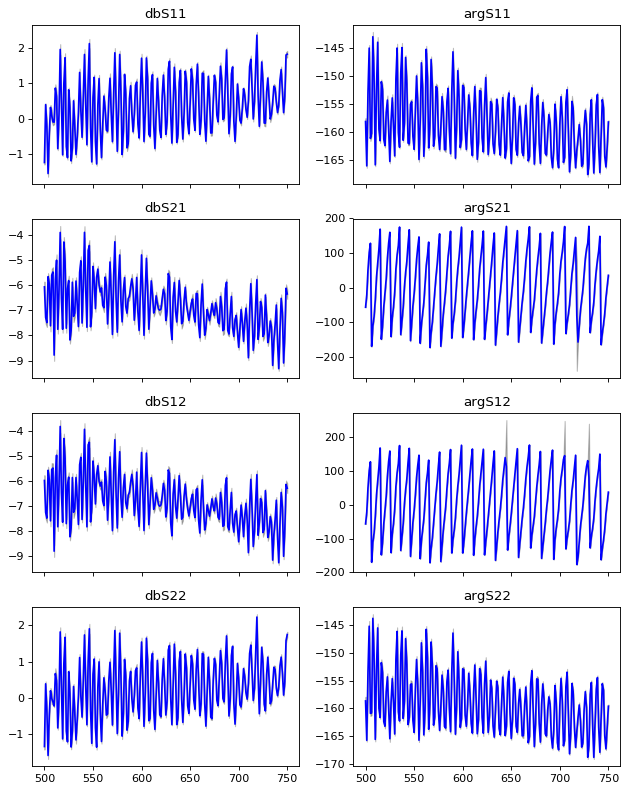

test.png
file://c:/users/sandersa/appdata/local/temp/1/tmpsoci_g.html


In [11]:
def MatplotlibFigure_to_String(figure):
    """Uses an image graph to trasform a matplotlib figure to a data string"""
    image_graph=ImageGraph()
    image_graph.set_state("MatplotlibFigure",figure)
    image_graph.move_to_node("Png")
    print(image_graph.data)
    in_file=open(image_graph.data,'rb')
    string=in_file.read()
    in_file.close()
    return string


new_svg=create_svg_black_box_diagram(inputs={"format":"DB",
    "monte_carlo_directory":os.path.join(r'C:\Share\MUF_FILES\DUTs\LineGR1_1-08_SOLT_Support\MonteCarlo')},
                                             outputs=["reference_curve"],
                                     function=create_monte_carlo_reference_curve,
                                     box_text_ratio=20,
                                     output_transformation_function=lambda x:MatplotlibFigure_to_String(plot_reference_curve(x)),
                                     output_mime_type="image/png")
new_html=HTMLBase()
new_html.add_head()
new_html.add_body()
new_html.append_to_body({"tag":"h1","text":"create_monte_carlo_reference_curve"})
new_html.append_to_body({"tag":"p","text":create_monte_carlo_reference_curve.__doc__})
new_html.append_to_body({"tag":"br"})
new_html.append_to_body(new_svg)
new_html.append_to_head({"tag":"style","text":"rect:hover {stroke-width:8;stroke:blue;}"})
new_html.show()

In [141]:
os.getcwd()

'C:\\Users\\sandersa\\PyCharmProjects\\Jupyter-Notebooks'

In [3]:
test_graph=ImageGraph()

In [8]:
import pdoc

pdoc.html(py)

In [10]:
create_svg_black_box_diagram.__doc__

'Creates a svg black box diagram given a input dictionary of name:value pairs, an outputs list of\n    output names and a function. Options are keywords that define the appearence of the diagram, to display the diagram\n    append it to the body of an html sheet'

In [12]:
visit_all_nodes.__doc__

'Visit all nodes visits each node on a graph'

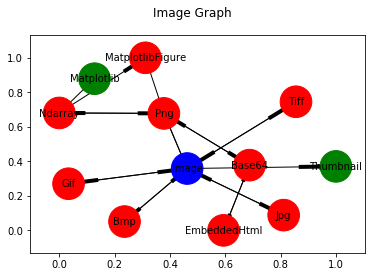

file://c:/users/sandersa/appdata/local/temp/1/tmpz6ulm5.html


In [16]:
test_graph=ImageGraph()
new_svg=create_svg_black_box_diagram(inputs={"Class":"ImageGraph"},
                                             outputs=["Plot"],
                                     function=test_graph.show,
                                     box_text_ratio=20,
                                     output_mime_type="image/png")
new_html=HTMLBase()
new_html.add_head()
new_html.add_body()
new_html.append_to_body({"tag":"h1","text":"create_monte_carlo_reference_curve"})
new_html.append_to_body({"tag":"p","text":create_monte_carlo_reference_curve.__doc__})
new_html.append_to_body({"tag":"br"})
new_html.append_to_body(new_svg)
new_html.append_to_head({"tag":"style","text":"rect:hover {stroke-width:8;stroke:blue;}"})
new_html.show()

In [17]:
test_graph.node_names

['Image',
 'Png',
 'Jpg',
 'Tiff',
 'Gif',
 'Bmp',
 'Base64',
 'EmbeddedHtml',
 'Ndarray',
 'MatplotlibFigure']

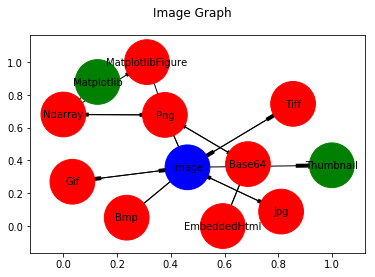

In [20]:
test_graph.show(node_size=2000,sav)

In [22]:
for node in test_graph.node_names:
    test_graph.move_to_node(node)
    test_graph.show(path=r"C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks\GraphPlots/"+node+".png",save_plot=True,node_size=2000)

pil_image.mode is RGBA
pil_image.mode is RGBA
pil_image.mode is RGB
pil_image.mode is RGB
pil_image.mode is RGB
pil_image.mode is RGB


In [37]:
plt.close()
plt.rcParams.update({'font.size': 12,"figure.figsize":(10,10)})
meta_graph=MetadataGraph()
for node in meta_graph.node_names:
    meta_graph.move_to_node(node)
    meta_graph.show(path=r"C:\Users\sandersa\PyCharmProjects\Jupyter-Notebooks\GraphPlots/"+node+"_MetaData.png",save_plot=True,node_size=2000)

[' a', '"First"']
['b', '"Second"']
['']


In [25]:
plt.close()

In [33]:
plt.rcParams.keys()

[u'_internal.classic_mode',
 u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.html',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.autolimit_mode',
 u'axes.axisbelow',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.offset_threshold',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.axis',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelpad',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.prop_cycle',
 u'axes.spines.bottom',
 u'axes.spines.left',
 u'axes.spines.right',
 u'axes.spines.top',
 u'axes.titlepad',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',


NameError: name 'HTMLReport' is not defined